In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_excel("/content/AI ML Internship Training Data.xlsx")

In [37]:
train_df.head()

,Shipment ID,Distance (km),Delayed,Shipment Day,Shipment Month,Origin_Ahmedabad,Origin_Bangalore,Origin_Chennai,Origin_Delhi,Origin_Hyderabad,...,Destination_Lucknow,Destination_Mumbai,Destination_Pune,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate
0,SHIP000000,1603,1,2,4,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,SHIP000001,1237,1,3,2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,SHIP000002,1863,0,1,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,SHIP000003,1374,0,5,4,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,SHIP000004,676,1,4,11,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


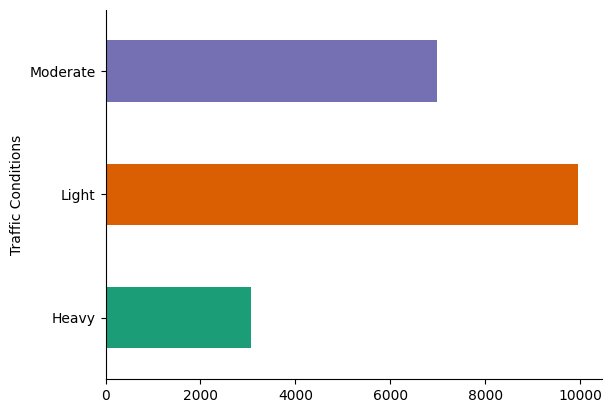

In [4]:
train_df.groupby('Traffic Conditions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

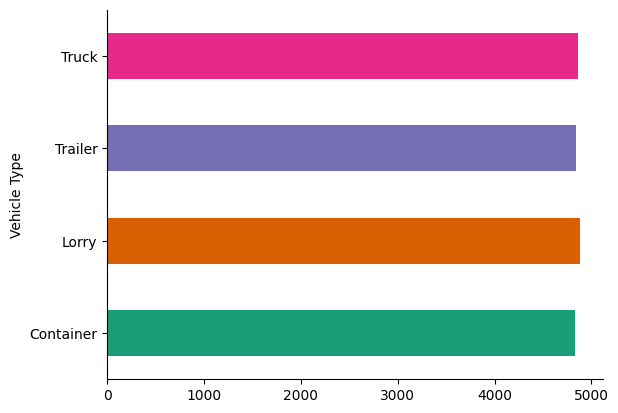

In [5]:
train_df.groupby('Vehicle Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
print(train_df.head())
print("Break")
print(train_df.info())
print("break")
print(train_df.describe())

  Shipment ID     Origin Destination Shipment Date Planned Delivery Date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  Actual Delivery Date Vehicle Type  Distance (km) Weather Conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  Traffic Conditions Delayed  
0              Light     Yes  
1           Moderate     Yes  
2          

In [7]:
print(train_df.isnull().sum())

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64


Predcting the Missing values of Vehicle Type using other condtions

In [8]:
train_df['Vehicle Type'].fillna('Unknown', inplace = True)

<ipython-input-8-c7b38cf459f0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Vehicle Type'].fillna('Unknown', inplace = True)


In [9]:
vehicle_delay_counts = train_df.groupby(['Vehicle Type', 'Delayed']).size().reset_index(name='Count')

# Display the grouped data
print(vehicle_delay_counts)

  Vehicle Type Delayed  Count
0    Container      No   1285
1    Container     Yes   3542
2        Lorry      No   1299
3        Lorry     Yes   3579
4      Trailer      No   1244
5      Trailer     Yes   3594
6        Truck      No   1256
7        Truck     Yes   3604
8      Unknown      No    159
9      Unknown     Yes    438


The delay proportion for each vehicle type is similar.. So vehicle type does not influence delays..
WE CAN DROP THE VEHICLE TYPE COMPLETELY IT WON'T AFFECT THE TRAINING

In [10]:
train_df = train_df.drop(columns = ['Vehicle Type'] , axis = 1)


Since the delay rate is consistent across types.



In [11]:
train_df.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,676,Clear,Heavy,Yes


In [12]:
train_df.dtypes

,0
Shipment ID,object
Origin,object
Destination,object
Shipment Date,datetime64[ns]
Planned Delivery Date,datetime64[ns]
Actual Delivery Date,datetime64[ns]
Distance (km),int64
Weather Conditions,object
Traffic Conditions,object
Delayed,object


In [13]:
train_df['Shipment Day'] = train_df['Shipment Date'].dt.dayofweek
train_df['Shipment Month'] = train_df['Shipment Date'].dt.month


train_df['Delivery Delay (days)'] = (train_df['Actual Delivery Date'] - train_df['Planned Delivery Date']).dt.days

train_df = train_df.drop(columns=['Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date'], axis=1)


In [14]:
train_df.head()

,Shipment ID,Origin,Destination,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Shipment Day,Shipment Month,Delivery Delay (days)
0,SHIP000000,Jaipur,Mumbai,1603,Rain,Light,Yes,2,4,1
1,SHIP000001,Bangalore,Delhi,1237,Storm,Moderate,Yes,3,2,4
2,SHIP000002,Mumbai,Chennai,1863,Clear,Light,No,1,9,0
3,SHIP000003,Hyderabad,Ahmedabad,1374,Clear,Light,No,5,4,0
4,SHIP000004,Chennai,Kolkata,676,Clear,Heavy,Yes,4,11,2


In [15]:
# train_df = train_df.drop(columns=['Shipment ID'])


In [16]:
categorical_columns = ['Origin', 'Destination', 'Weather Conditions', 'Traffic Conditions']

encoded_features = pd.get_dummies(train_df[categorical_columns], drop_first=False)

train_df = train_df.drop(columns=categorical_columns)

train_df = pd.concat([train_df, encoded_features], axis=1)

print(train_df.head())


  Shipment ID  Distance (km) Delayed  Shipment Day  Shipment Month  \
0  SHIP000000           1603     Yes             2               4   
1  SHIP000001           1237     Yes             3               2   
2  SHIP000002           1863      No             1               9   
3  SHIP000003           1374      No             5               4   
4  SHIP000004            676     Yes             4              11   

   Delivery Delay (days)  Origin_Ahmedabad  Origin_Bangalore  Origin_Chennai  \
0                      1             False             False           False   
1                      4             False              True           False   
2                      0             False             False           False   
3                      0             False             False           False   
4                      2             False             False            True   

   Origin_Delhi  ...  Destination_Lucknow  Destination_Mumbai  \
0         False  ...             

In [17]:
train_df = train_df.replace({True: 1, False: 0})

<ipython-input-17-e50ff043d81d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df = train_df.replace({True: 1, False: 0})


In [18]:
train_df.head()

,Shipment ID,Distance (km),Delayed,Shipment Day,Shipment Month,Delivery Delay (days),Origin_Ahmedabad,Origin_Bangalore,Origin_Chennai,Origin_Delhi,...,Destination_Lucknow,Destination_Mumbai,Destination_Pune,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate
0,SHIP000000,1603,Yes,2,4,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,SHIP000001,1237,Yes,3,2,4,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,SHIP000002,1863,No,1,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,SHIP000003,1374,No,5,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,SHIP000004,676,Yes,4,11,2,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


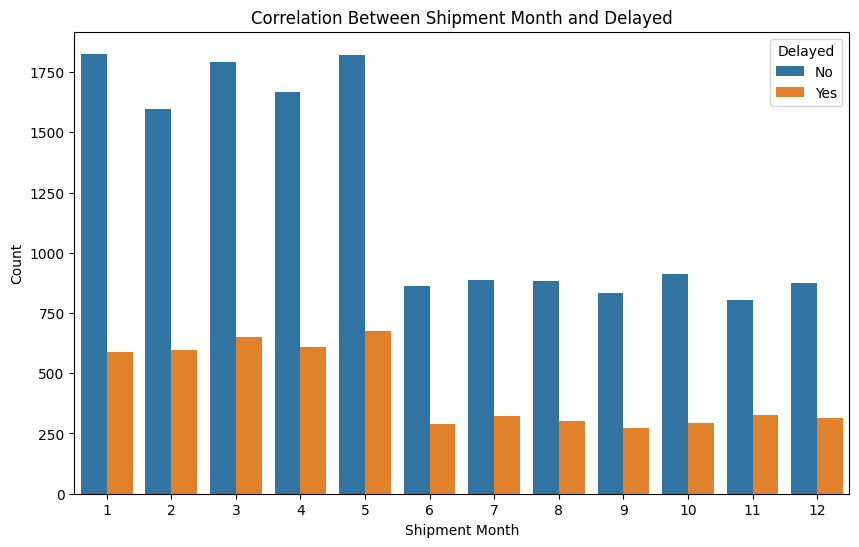

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Shipment Month', hue='Delayed', data=train_df)
plt.title('Correlation Between Shipment Month and Delayed')
plt.xlabel('Shipment Month')
plt.ylabel('Count')
plt.legend(title='Delayed', labels=['No', 'Yes'])
plt.show()

<ipython-input-20-3691d89ef6b8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(delayed_shipments['Delivery Delay (days)'], shade=True, color='r', label='Delayed Shipments')
<ipython-input-20-3691d89ef6b8>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_delayed_shipments['Delivery Delay (days)'], shade=True, color='g', label='Non-Delayed Shipments')
<ipython-input-20-3691d89ef6b8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(non_delayed_shipments['Delivery Delay (days)'], shade=True, color='g', label='Non-Delayed Shipments')


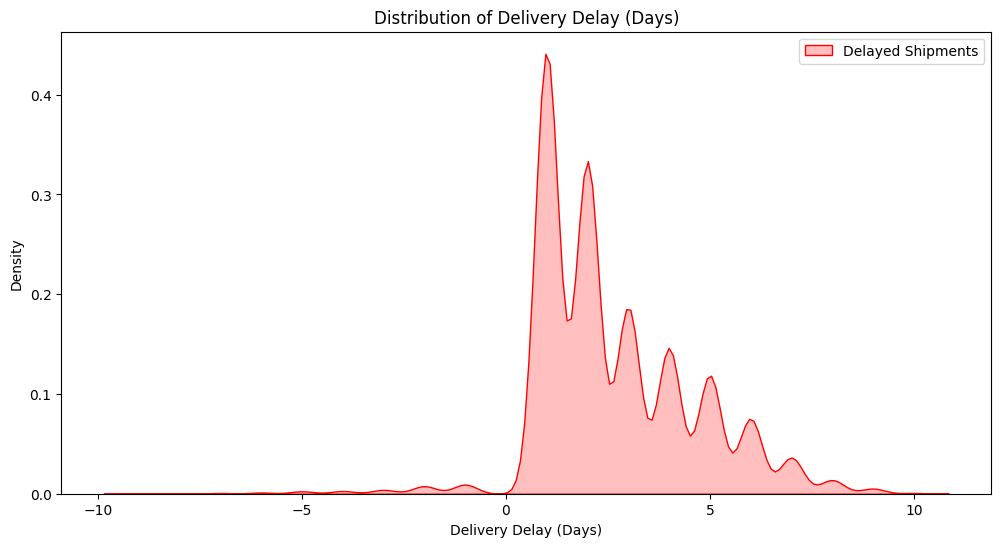

In [20]:
delayed_shipments = train_df[train_df['Delayed'] == 'Yes']
non_delayed_shipments = train_df[train_df['Delayed'] == 'No']

plt.figure(figsize=(12, 6))
sns.kdeplot(delayed_shipments['Delivery Delay (days)'], shade=True, color='r', label='Delayed Shipments')
sns.kdeplot(non_delayed_shipments['Delivery Delay (days)'], shade=True, color='g', label='Non-Delayed Shipments')
plt.title('Distribution of Delivery Delay (Days)')
plt.xlabel('Delivery Delay (Days)')
plt.ylabel('Density')
plt.legend()
plt.show()

Based on the relationship graph we can see that only the number of shipment changes through the year and not the delays proportion..

In other words we can say that delays do not depend upon what month that it is

  

In [21]:
print(train_df.head())

  Shipment ID  Distance (km) Delayed  Shipment Day  Shipment Month  \
0  SHIP000000           1603     Yes             2               4   
1  SHIP000001           1237     Yes             3               2   
2  SHIP000002           1863      No             1               9   
3  SHIP000003           1374      No             5               4   
4  SHIP000004            676     Yes             4              11   

   Delivery Delay (days)  Origin_Ahmedabad  Origin_Bangalore  Origin_Chennai  \
0                      1                 0                 0               0   
1                      4                 0                 1               0   
2                      0                 0                 0               0   
3                      0                 0                 0               0   
4                      2                 0                 0               1   

   Origin_Delhi  ...  Destination_Lucknow  Destination_Mumbai  \
0             0  ...             

In [22]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_df[['Distance (km)', 'Delivery Delay (days)']] = scaler.fit_transform(
#     train_df[['Distance (km)', 'Delivery Delay (days)']]
# )


COMMENTED OUT SCALER BECAUSE IT DO NOT HAVE ANY AFFECT ON THE ACCURACY

In [23]:
train_df['Delayed'] = train_df['Delayed'].map({'No': 0, 'Yes': 1})


In [24]:
train_df = train_df.drop(columns=['Delivery Delay (days)'])


In [25]:
X = train_df.drop(columns=['Shipment ID', 'Delayed'])
y = train_df['Delayed']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)


In [28]:
# from sklearn.metrics import classification_report

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))


In [29]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# feature_importance = model.feature_importances_
# sns.barplot(x=feature_importance, y=X.columns)
# plt.title('Feature Importance')
# plt.show()


In [30]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# print("Cross-Validation Scores:", scores)


**USE THE ABOVE FOR EXPERIMENTING WITH RANDOMFOREST**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [32]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)


y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Accuracy (Logistic Regression): {accuracy_logreg}")
print("Classification Report (Logistic Regression):\n", classification_report_logreg)

Accuracy (Logistic Regression): 0.9115
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1059
           1       1.00      0.88      0.94      2941

    accuracy                           0.91      4000
   macro avg       0.87      0.94      0.90      4000
weighted avg       0.93      0.91      0.92      4000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OBSERVATION - Random forest has a bit low accuracy as compared to Logistic Regression Model

In [33]:
import pickle


In [34]:
filename = 'finalized_model.sav'
pickle.dump(logreg_model, open(filename, 'wb'))

In [35]:
print(X.shape[1])

30


In [36]:
print(X.columns.tolist())

['Distance (km)', 'Shipment Day', 'Shipment Month', 'Origin_Ahmedabad', 'Origin_Bangalore', 'Origin_Chennai', 'Origin_Delhi', 'Origin_Hyderabad', 'Origin_Jaipur', 'Origin_Kolkata', 'Origin_Lucknow', 'Origin_Mumbai', 'Origin_Pune', 'Destination_Ahmedabad', 'Destination_Bangalore', 'Destination_Chennai', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Jaipur', 'Destination_Kolkata', 'Destination_Lucknow', 'Destination_Mumbai', 'Destination_Pune', 'Weather Conditions_Clear', 'Weather Conditions_Fog', 'Weather Conditions_Rain', 'Weather Conditions_Storm', 'Traffic Conditions_Heavy', 'Traffic Conditions_Light', 'Traffic Conditions_Moderate']
